# Ejemplo básico de convolución

En este notebook exploraremos **la operación de convolución**, una herramienta fundamental en el **procesamiento de imágenes** y en las **redes neuronales convolucionales (CNN)**.

---

## Objetivo
Comprender **cómo actúa un filtro (kernel)** al recorrer una imagen representada como una **matriz de píxeles**, modificando sus valores para **resaltar, suavizar o detectar bordes**.  
De esta manera, podremos visualizar de forma práctica **cómo las CNN aprenden a extraer características importantes** de las imágenes.

---

## ¿Qué es la convolución?
La **convolución** es una operación matemática que combina dos funciones:
1. Una **imagen de entrada** (por ejemplo, una matriz 6×6 de valores de intensidad).  
2. Un **filtro o kernel** (una pequeña matriz, como de 3×3).

El filtro se desplaza por toda la imagen y en cada posición realiza una **multiplicación elemento a elemento**, sumando los resultados para formar un **nuevo valor**.  
Este proceso genera una **nueva imagen filtrada**, donde ciertas zonas se **acentúan o atenúan** dependiendo del tipo de filtro aplicado.

---

En resumen, la convolución nos permite **transformar una imagen para extraer patrones**, siendo la base del funcionamiento de las **redes neuronales convolucionales modernas**.


### Importamos librerías necesarias 

In [3]:
import torch                     # Tensores y operaciones numéricas
import torch.nn as nn            # Capas de redes (Conv2d, Linear, etc.)
import matplotlib.pyplot as plt  # Gráficas
import numpy as np               # Utilidades numéricas


### Ejemplo de convolución

tensor([[ 0., 30., 30.,  0.],
        [ 0., 30., 30.,  0.],
        [ 0., 30., 30.,  0.],
        [ 0., 30., 30.,  0.]])


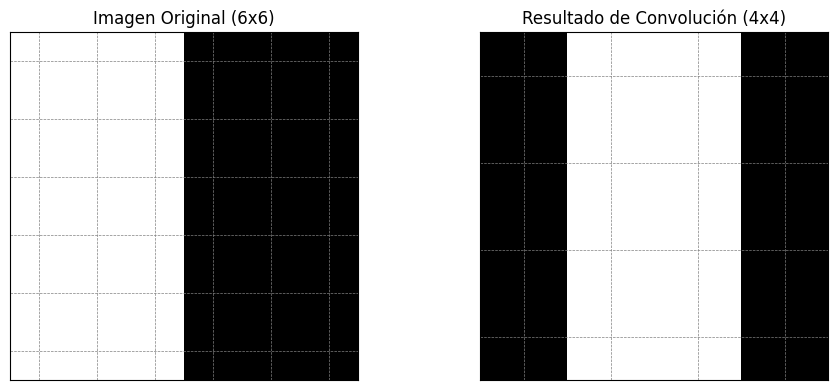

In [4]:
# 1) Imagen de entrada (6x6)
# torch.tensor(): crea un tensor; .float() lo convierte a tipo float32
input_matrix = torch.tensor([
    [10., 10., 10., 0., 0., 0.],
    [10., 10., 10., 0., 0., 0.],
    [10., 10., 10., 0., 0., 0.],
    [10., 10., 10., 0., 0., 0.],
    [10., 10., 10., 0., 0., 0.],
    [10., 10., 10., 0., 0., 0.]
]).float()

# 2) Kernel 3x3 para bordes verticales
kernel = torch.tensor([
    [ 1., 0., -1.],
    [ 1., 0., -1.],
    [ 1., 0., -1.]
]).float()

# 3) Cambiar forma a 4D para Conv2d
# .view(N, C, H, W)
#   N = número de imágenes (batch)
#   C = canales (1 si es en blanco y negro)
#   H = alto (filas)
#   W = ancho (columnas)
input_tensor = input_matrix.view(1, 1, 6, 6)

# 4) Crear una capa de convolución 2D
# nn.Conv2d(
#   in_channels=1,  # canales de entrada (imagen en gris)
#   out_channels=1, # filtros de salida (solo uno)
#   kernel_size=3,  # tamaño del filtro (3x3)
#   padding=0,      # sin relleno → salida será 4x4
#   bias=False      # sin término de sesgo
# )
model = nn.Sequential(nn.Conv2d(1, 1, kernel_size=3, padding=0, bias=False))

# 5) Cargar manualmente el kernel
# .weight tiene forma (out_channels, in_channels, kernel_height, kernel_width)
# .view() ajusta el kernel 3x3 al formato que Conv2d espera
# .data asigna los valores directamente al peso del modelo
model[0].weight.data = kernel.view(1, 1, 3, 3)

# 6) Aplicar la convolución
# model(input_tensor): aplica el filtro sobre la imagen
output_tensor = model(input_tensor)

# .squeeze(): elimina dimensiones de tamaño 1 → pasa de (1,1,4,4) a (4,4)
# .detach(): desconecta del grafo de autograd para evitar seguimiento del gradiente
output_matrix = output_tensor.squeeze().detach()
print(output_matrix)

# 7) Visualización
# plt.figure(figsize=(ancho, alto))
# Crea una figura del tamaño deseado en pulgadas (10x4)
plt.figure(figsize=(10, 4))

# --- Subplot 1: Imagen Original ---
plt.subplot(1, 2, 1)  # (n_filas, n_columnas, índice)
plt.imshow(input_matrix.numpy(), cmap='gray', vmin=0, vmax=10)
plt.title('Imagen Original (6x6)')
plt.xticks(np.arange(input_matrix.shape[1]))
plt.yticks(np.arange(input_matrix.shape[0]))
plt.tick_params(axis='both', which='both',
                bottom=False, top=False, left=False, right=False,
                labelbottom=False, labelleft=False)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# --- Subplot 2: Resultado ---
plt.subplot(1, 2, 2)
plt.imshow(output_matrix.numpy(), cmap='gray', vmin=0, vmax=30)
plt.title('Resultado de Convolución (4x4)')
plt.xticks(np.arange(output_matrix.shape[1]))
plt.yticks(np.arange(output_matrix.shape[0]))
plt.tick_params(axis='both', which='both',
                bottom=False, top=False, left=False, right=False,
                labelbottom=False, labelleft=False)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()  # Ajusta los espacios entre subplots
plt.show()

### Ejemplos de filtros: Aplicación de filtros Sobel y Prewitt (FashionMNIST)

Mostrando resultados de los filtros...


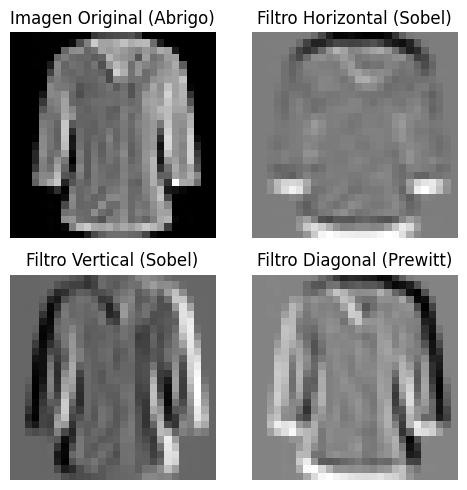

In [ ]:
import torch                      # Tensores y operaciones numéricas
import torch.nn as nn             # Capas de redes neuronales (Conv2d, Linear, etc.)
import torchvision                # Conjuntos de datos e imágenes comunes
import torchvision.transforms as transforms  # Transformaciones sobre imágenes
import matplotlib.pyplot as plt   # Visualización
import numpy as np                # Operaciones numéricas (solo para utilidades menores)

# 1️. Transformaciones
# transforms.Compose() encadena transformaciones que se aplican al cargar una imagen.
# transforms.ToTensor(): convierte la imagen en un tensor y normaliza valores a [0,1].
# transforms.Grayscale(): asegura que la imagen tenga un solo canal (escala de grises).
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale()
])

# 2️. Dataset de prueba: FashionMNIST
# torchvision.datasets.FashionMNIST():
#   root="data/"    → carpeta donde se descargan los datos.
#   train=False     → usamos el conjunto de prueba.
#   download=True   → descarga si no está disponible.
#   transform=...   → aplica la transformación anterior a cada imagen.
test_dataset = torchvision.datasets.FashionMNIST(
    root="data/",
    train=False,
    download=True,
    transform=transform
)

# 3️. Seleccionar una imagen del dataset
# test_dataset[i] devuelve (imagen_tensor, etiqueta)
# En este caso, índice 4 corresponde a una prenda tipo "abrigo".
img_tensor, _ = test_dataset[4]

# 4️. Añadir una dimensión de lote (batch)
# .unsqueeze(0) agrega una dimensión en la posición 0 → (1, 1, 28, 28)
# Requerido por Conv2d: (batch, canales, alto, ancho)
input_tensor = img_tensor.unsqueeze(0)

# 5️. Definición de filtros (kernels)
# Cada filtro es una matriz 3x3 que resalta patrones en diferentes direcciones.

# Filtro Sobel Horizontal: detecta bordes horizontales.
filtro_horizontal = torch.tensor([
    [ 1.,  2.,  1.],
    [ 0.,  0.,  0.],
    [-1., -2., -1.]
]).float()

# Filtro Sobel Vertical: detecta bordes verticales.
filtro_vertical = torch.tensor([
    [ 1.,  0., -1.],
    [ 2.,  0., -2.],
    [ 1.,  0., -1.]
]).float()

# Filtro Diagonal (similar a Prewitt): detecta bordes diagonales.
filtro_diagonal = torch.tensor([
    [ 0.,  1.,  1.],
    [-1.,  0.,  1.],
    [-1., -1.,  0.]
]).float()

# 6️. Función para aplicar un filtro a una imagen
def aplicar_filtro(imagen, kernel):
    """Aplica un kernel de convolución 3x3 a una imagen en escala de grises."""

    # .view(): ajusta forma a (out_ch, in_ch, alto, ancho)
    kernel_tensor = kernel.view(1, 1, 3, 3)

    # nn.Conv2d():
    #   in_channels=1  → imagen en gris
    #   out_channels=1 → una salida (un mapa filtrado)
    #   kernel_size=3  → filtro 3x3
    #   padding=1      → relleno de un píxel para mantener el tamaño original (28x28)
    #   bias=False     → sin sesgo, solo el efecto del filtro
    conv_layer = nn.Conv2d(in_channels=1,
                           out_channels=1,
                           kernel_size=3,
                           padding=1,
                           bias=False)

    # Asignar manualmente nuestro kernel al peso de la capa
    conv_layer.weight.data = kernel_tensor

    # Aplicar la convolución
    output_tensor = conv_layer(imagen)

    # .squeeze() elimina dimensiones innecesarias, .detach() lo desconecta del grafo de PyTorch
    return output_tensor.squeeze().detach()

# 7️. Aplicar los tres filtros
img_horizontal = aplicar_filtro(input_tensor, filtro_horizontal)
img_vertical   = aplicar_filtro(input_tensor, filtro_vertical)
img_diagonal   = aplicar_filtro(input_tensor, filtro_diagonal)

# 8️. Visualización
print("Mostrando resultados de los filtros...")

plt.figure(figsize=(5, 5))  # Crea una figura cuadrada 5x5 pulgadas

# Imagen original
plt.subplot(2, 2, 1)
plt.imshow(img_tensor.squeeze(), cmap='gray')
plt.title('Imagen Original (Abrigo)')
plt.axis('off')  # Oculta ejes

# Filtro Horizontal
plt.subplot(2, 2, 2)
plt.imshow(img_horizontal, cmap='gray')
plt.title('Filtro Horizontal (Sobel)')
plt.axis('off')

# Filtro Vertical
plt.subplot(2, 2, 3)
plt.imshow(img_vertical, cmap='gray')
plt.title('Filtro Vertical (Sobel)')
plt.axis('off')

# Filtro Diagonal
plt.subplot(2, 2, 4)
plt.imshow(img_diagonal, cmap='gray')
plt.title('Filtro Diagonal (Prewitt)')
plt.axis('off')

plt.tight_layout()  # Ajusta los márgenes entre subplots
plt.show()
